
# Test clouds and skimage in a mountain range


### JAH, April 2021

In [135]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [148]:
import numpy             as np
import matplotlib.pyplot as plt

import clouds.clouds    as clouds
import clouds.pltclouds as pltclouds

In [149]:
import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Fri Apr 23 16:50:28 2021


In [264]:
def generate(xfun, yfun, size = 10000, npoints = 10, sigma = 1., nbins = 20):

    ts = size *[np.linspace(0, 1, npoints),]
    ts = np.concatenate(ts)
    nsize = len(ts)
    
    def _noise():
        sigma * np.random.normal(size = nsize)
        
    xs = xfun(ts) 
    ys = yfun(ts)

    xs += sigma * np.random.normal(size = nsize)
    ys += sigma * np.random.normal(size = nsize)
    
    
    plt.figure()
    counts, xedges, yedges, _ = plt.hist2d(xs, ys, (nbins, nbins));

    xcs = 0.5 * (xedges[1:] + xedges[:-1])
    ycs = 0.5 * (yedges[1:] + yedges[:-1])

    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    
    xms, yms = np.meshgrid(xcs, ycs)

    plt.figure()
    plt.contour(xms, yms, counts.T, levels = nbins);
    
    x_cell = xms.flatten()
    y_cell = yms.flatten()
    e_cell = counts.T.flatten()
    
    return (x_cell, y_cell), (dx, dy), e_cell, counts.T

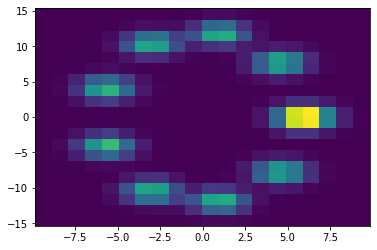

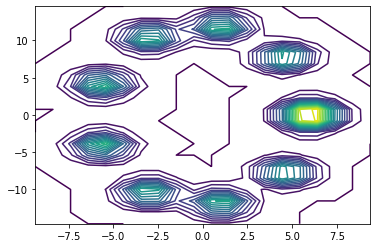

In [275]:
scale = 6
xfun  = lambda t:    scale * np.cos(2 * np.pi * t)
yfun  = lambda t: 2* scale * np.sin(2 * np.pi * t)

coors, steps, ene, image = generate(xfun, yfun, size = 10000)

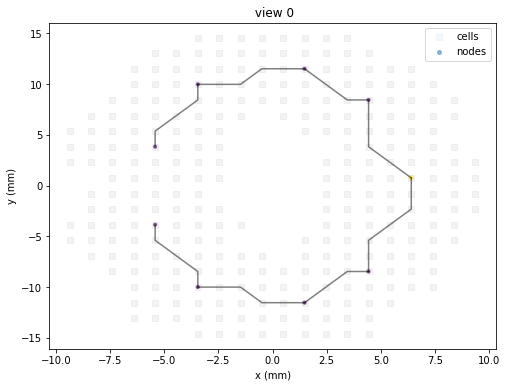

In [276]:
dfclouds = clouds.clouds(coors, steps, ene)
draw, plots = pltclouds.get_draw_clouds(dfclouds)
draw(plots, scale = 0.001);

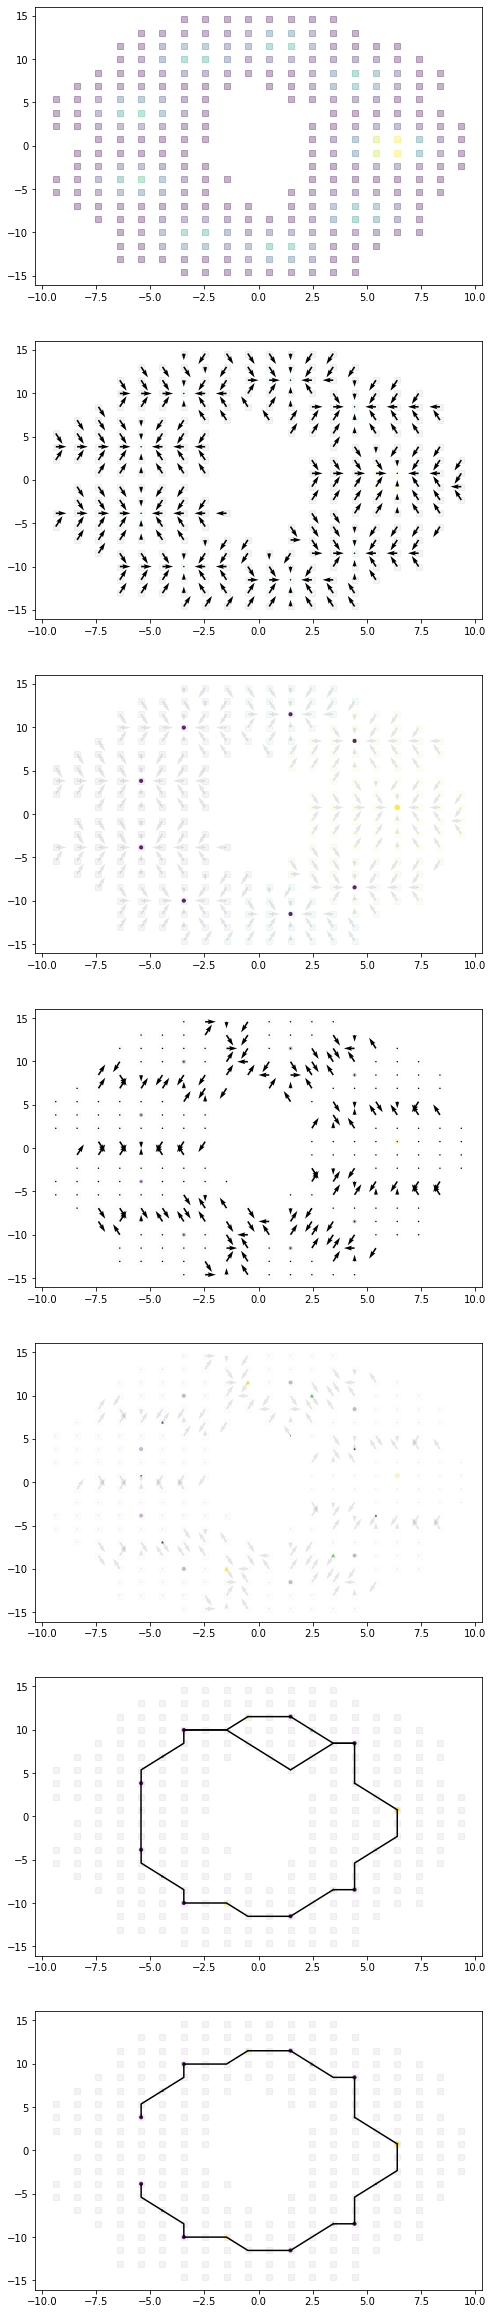

In [277]:
pltclouds.dcloud_steps(dfclouds, 2, scale = 0.001)

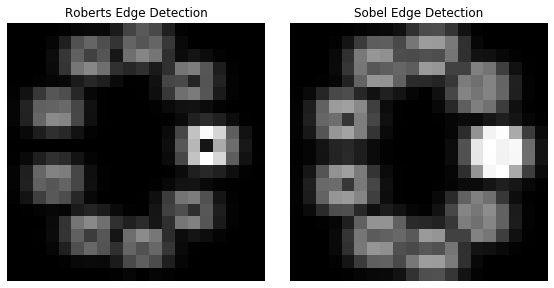

In [278]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images


#image = camera()
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()

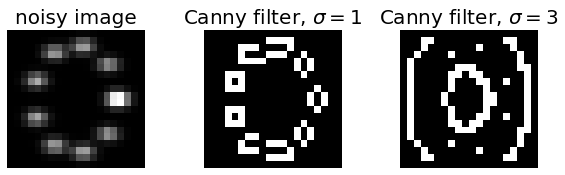

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
#im = np.zeros((128, 128)
#im[32:-32, 32:-32] = 1


#im = ndi.rotate(im, 15, mode='constant')
#im = ndi.gaussian_filter(im, 4)
#im += 0.2 * np.random.random(im.shape)

im = image

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im, sigma = 0.01)
edges2 = feature.canny(im, sigma = 3.0)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()


In [280]:
##--- Anothe example

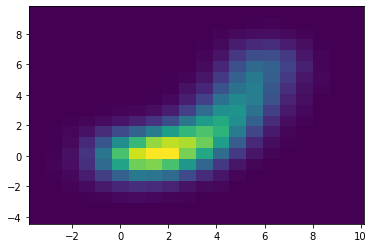

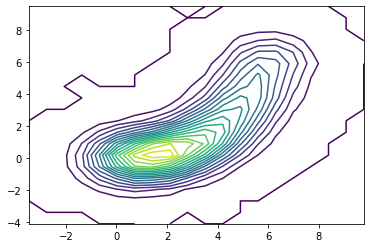

In [286]:
scale = 6
xfun  = lambda t: scale *  t
yfun  = lambda t: scale * t * t * t

coors, steps, ene, image = generate(xfun, yfun, size = 10000)

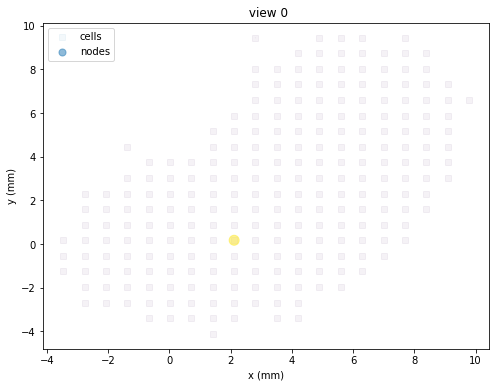

In [287]:
dfclouds = clouds.clouds(coors, steps, ene)
draw, plots = pltclouds.get_draw_clouds(dfclouds)
draw(plots, scale = 0.001);

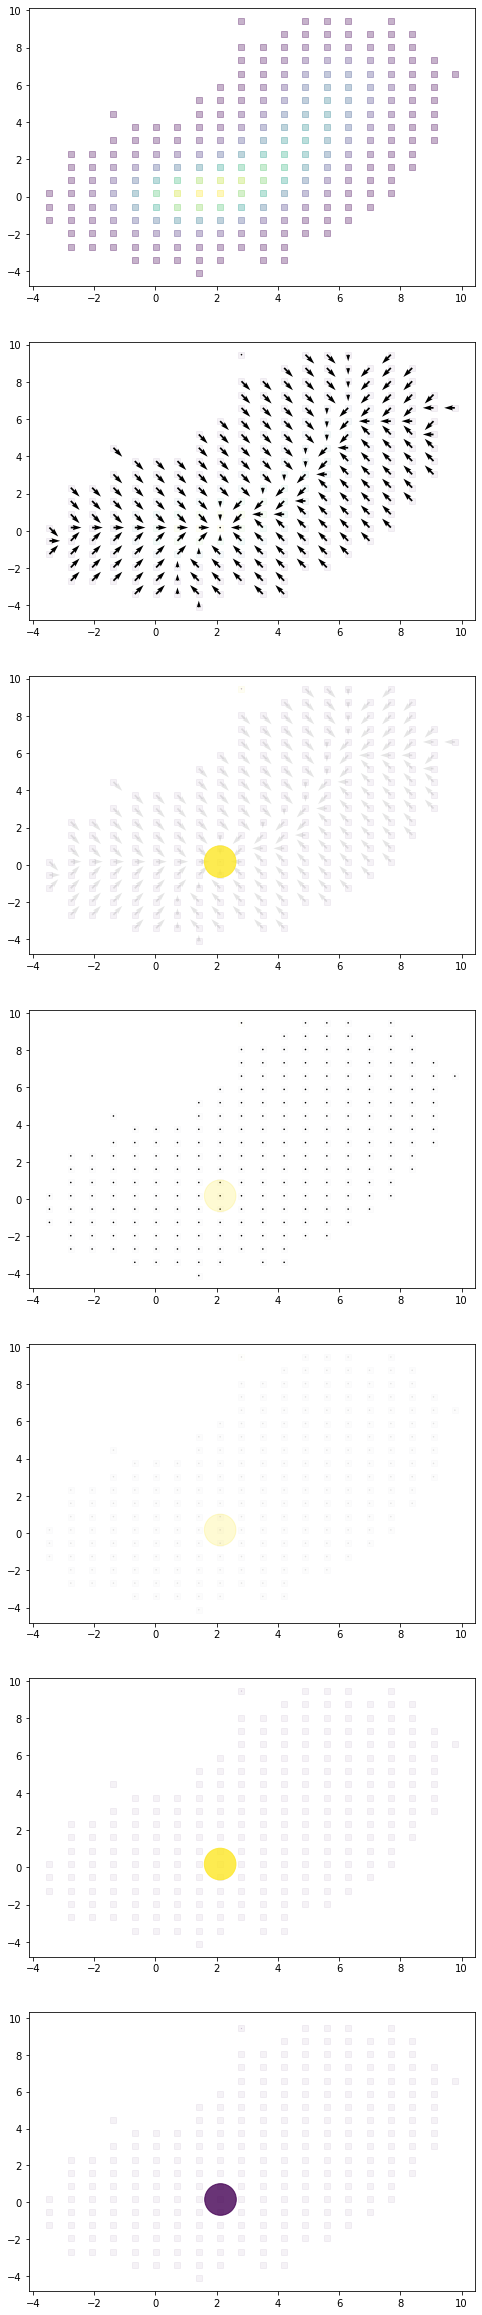

In [288]:
pltclouds.dcloud_steps(dfclouds, 2, scale = 0.01)